In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('preprocess 1951 to 2021.csv')

In [3]:
df

,time,lon,lat,temp,year,month,day
0,1951-01-01,83,25.5,22.980000,1951,1,1
1,1951-01-02,83,25.5,21.580000,1951,1,2
2,1951-01-03,83,25.5,21.510000,1951,1,3
3,1951-01-04,83,25.5,21.410000,1951,1,4
4,1951-01-05,83,25.5,22.889999,1951,1,5
...,...,...,...,...,...,...,...
25862,2021-12-27,83,25.5,24.007275,2021,12,27
25863,2021-12-28,83,25.5,21.532618,2021,12,28
25864,2021-12-29,83,25.5,18.243288,2021,12,29
25865,2021-12-30,83,25.5,18.774710,2021,12,30


In [4]:
df.shape

(25867, 7)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the dataset for linear regression
# Using 'year' as the independent variable and 'temp' as the dependent variable
X = df[['year']]
y = df['temp']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(31.807187537710323, 0.0005870129968253979)

In [6]:
from sklearn.metrics import mean_absolute_error

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

mae


4.481702986745232

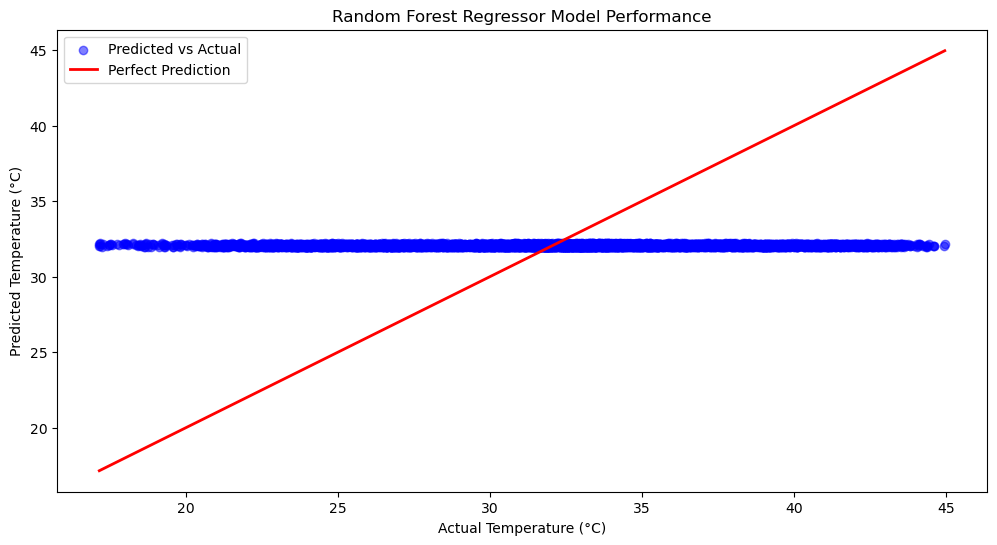

In [9]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Random Forest Regressor Model Performance')
plt.legend()
plt.show()

In [29]:
# It looks like the `scaler` object was not defined in the current context.
# Let's redefine the scaler and apply the Decision Tree again.

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Scale the data again
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df[['year', 'temp']])

# Create sequences of data
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])  # year data
        y.append(data[i, 1])  # temperature data
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 5

# Create sequences
X, y = create_sequences(data_scaled, seq_length)

# Reshape X for model input
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1]), y_train)

# Make predictions on the test set
y_dt_pred = dt_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1]))

# Inverse transform the predictions and true values
y_dt_pred_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_dt_pred), 1)), y_dt_pred.reshape(-1, 1)), axis=1))[:, 1]
y_test_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 1)), y_test.reshape(-1, 1)), axis=1))[:, 1]

# Evaluate the model's performance
dt_mse = mean_squared_error(y_test_inv, y_dt_pred_inv)
dt_r2 = r2_score(y_test_inv, y_dt_pred_inv)
dt_mae = mean_absolute_error(y_test_inv, y_dt_pred_inv)

dt_mse, dt_r2, dt_mae


(31.176127742230975, 0.026704541734020038, 4.454402617318498)

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Create and train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1]), y_train)

# Make predictions on the test set
y_rf_pred = rf_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1]))

# Inverse transform the predictions and true values
y_rf_pred_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_rf_pred), 1)), y_rf_pred.reshape(-1, 1)), axis=1))[:, 1]
y_test_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 1)), y_test.reshape(-1, 1)), axis=1))[:, 1]

# Evaluate the model's performance
rf_mse = mean_squared_error(y_test_inv, y_rf_pred_inv)
rf_r2 = r2_score(y_test_inv, y_rf_pred_inv)
rf_mae = mean_absolute_error(y_test_inv, y_rf_pred_inv)

rf_mse, rf_r2, rf_mae


(31.18125465773553, 0.026544483255406037, 4.468994037592278)

In [31]:
from sklearn.neighbors import KNeighborsRegressor

# Create and train a K-Nearest Neighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1]), y_train)

# Make predictions on the test set
y_knn_pred = knn_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1]))

# Inverse transform the predictions and true values
y_knn_pred_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_knn_pred), 1)), y_knn_pred.reshape(-1, 1)), axis=1))[:, 1]
y_test_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 1)), y_test.reshape(-1, 1)), axis=1))[:, 1]

# Evaluate the model's performance
knn_mse = mean_squared_error(y_test_inv, y_knn_pred_inv)
knn_r2 = r2_score(y_test_inv, y_knn_pred_inv)
knn_mae = mean_absolute_error(y_test_inv, y_knn_pred_inv)

knn_mse, knn_r2, knn_mae


(39.496530403198655, -0.23305222433459694, 5.077003897492346)